In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

face_cascade = cv2.CascadeClassifier('gui/assets/haarcascade_frontalface_default.xml')

In [4]:

train = glob.glob("data/CK+/*/*.png")


In [6]:
len(train)

920

In [12]:
images = {
    "train":{},
    "test":{}
}

In [13]:

for path in train:
    person = path.split("/")[2]
    images["train"][person] = images["train"].get(person,[]) + [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)]

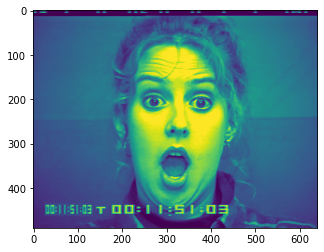

In [17]:

img = images["train"]["surprise"][0]
plt.imshow(img)

In [19]:
y_=[]
x_=[]
for typ, collection in images.items():
    for name, photos in collection.items():
        for img in photos:
            for coord in face_cascade.detectMultiScale(img, 1.5, 5):
                y_.append(name)
                x, y, w, h = coord
                x_.append(img[y:y+h, x:x+w])

In [25]:
for i in range(len(y_)):
    cv2.imwrite(f'data/CK_cut/{y_[i]}/{y_[i]}{i}.png',x_[i])

{'anger',
 'contempt',
 'disgust',
 'fear',
 'happiness',
 'neutral',
 'sadness',
 'surprise'}